In [1]:
import pandas as pd
import numpy as np
import io
import requests
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/mohitsharma-23/Python_projects/main/kc_house_data.csv'

download = requests.get(url).content

data = pd.read_csv(io.StringIO(download.decode('utf-8')), error_bad_lines=False)

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Visualizing the data to find which factors affecting the price

In [4]:
data.shape

(21613, 21)

In [5]:
data.columns.to_list()

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [6]:
print(data['condition'])

0        3
1        3
2        3
3        5
4        3
        ..
21608    3
21609    3
21610    3
21611    3
21612    3
Name: condition, Length: 21613, dtype: int64


In [12]:
# Filtering the data to get only the relevant parameters
x_train = data[['bedrooms','bathrooms','sqft_living','floors','condition','sqft_above','sqft_basement','yr_built']].to_numpy()
y_train = data['price'].to_numpy()
print(x_train, x_train.shape)
print(y_train, y_train.shape)

[[3.000e+00 1.000e+00 1.180e+03 ... 1.180e+03 0.000e+00 1.955e+03]
 [3.000e+00 2.250e+00 2.570e+03 ... 2.170e+03 4.000e+02 1.951e+03]
 [2.000e+00 1.000e+00 7.700e+02 ... 7.700e+02 0.000e+00 1.933e+03]
 ...
 [2.000e+00 7.500e-01 1.020e+03 ... 1.020e+03 0.000e+00 2.009e+03]
 [3.000e+00 2.500e+00 1.600e+03 ... 1.600e+03 0.000e+00 2.004e+03]
 [2.000e+00 7.500e-01 1.020e+03 ... 1.020e+03 0.000e+00 2.008e+03]] (21613, 8)
[221900. 538000. 180000. ... 402101. 400000. 325000.] (21613,)


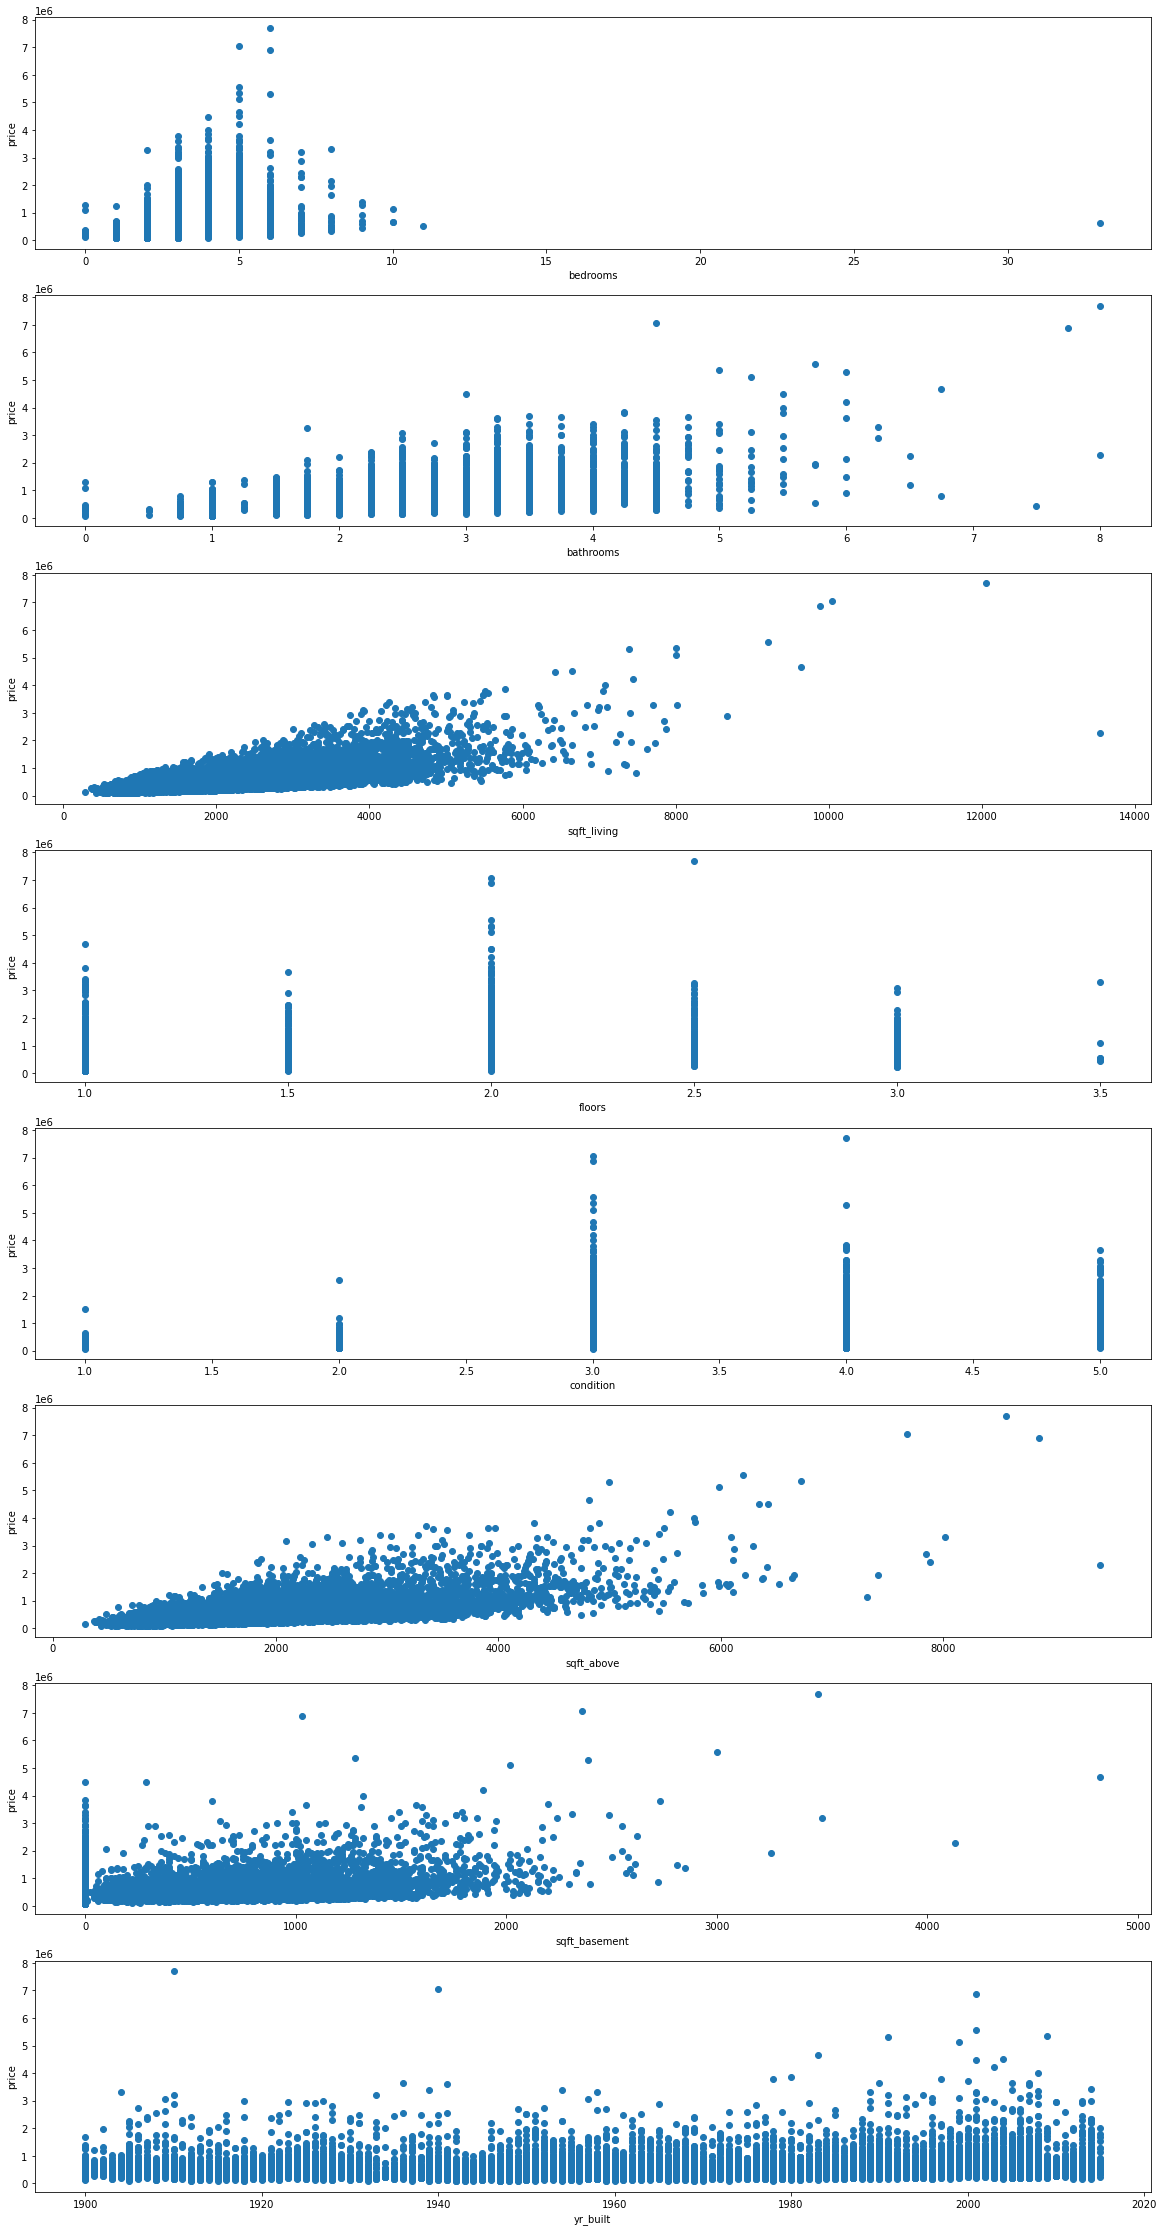

In [16]:
# PLotting the data to find the effect of each component on tHe price of the house
headings = ['bedrooms','bathrooms','sqft_living','floors','condition','sqft_above','sqft_basement','yr_built']
fig, ax = plt.subplots(8,figsize=(20,40))
for i in range(8):
        ax[i].scatter(x_train[:,i],y_train)
        ax[i].set(xlabel= headings[i], ylabel = 'price')

From the above data visualization we see that the price is more governed by the sqft_living, thus we use only the sqft_living, sqft_above and sqft_basement for ML

In [18]:
x_train_2 = x_train[:,[2,5,6]]
print(x_train_2)

[[1180. 1180.    0.]
 [2570. 2170.  400.]
 [ 770.  770.    0.]
 ...
 [1020. 1020.    0.]
 [1600. 1600.    0.]
 [1020. 1020.    0.]]


# Linear regression

In [20]:
def compute_cost(x,y,w,b):
    '''
    x - numpy array containing the training data
    y - numpy array containing the target values
    w,b - weight, bias
    
    returns
    cost - cost of the predicted function

    '''
    m = x.shape[0]
    
    for i in range(m):
        pred = np.dot(w,x[i,:]) + b
        cost = cost + (pred - y[i])**2
    cost = cost/(2*m)
    
    return cost

In [21]:
def compute_gradient(x,y,w,b):
    '''
    x - numpy array containing the training data
    y - numpy array containing the target values
    w,b - weight, bias
    
    returns
    dj_dw - gradient of the cost function w.r.t weights
    dj_db - gradient of the cost function w.r.t bias

    '''
    m = x.shape[0]
    
    for i in range(m):
        pred = np.dot(w,x[i,:]) + b
        dj_dw = dj_dw + np.dot(pred,x[i,:])
        dj_db = dj_db + pred
    
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    
    return dj_dw,dj_db